# Using Random Numbers to Solve Integrals

We see in the previews example that using random numbers we can plot dots until we fill the area of a square, we can try to use this property to solve an integral by relating the ratio of points below and above the function we want to integrate and the area of the numbers we are sampling. (Let's remember we must know this area for the model to work)

First, let's try to know the area covered by the $\sin x$, from 0 to $\pi$.

If we randomly put points in the rectangular area from 0 to $\pi$ in the $x$ axis and from 0 to 1 in the $y$ axis, we have a rectangle of area $\pi$. Then the area under the curve should be estimated:

$$A = \frac{\text{points inside}}{\text{total points}} \times \pi $$


In [ ]:
# importing usefull libraries
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
import scipy.stats as stats

In [10]:
# Lets define the function we want to integrate
N = 10000

x_in = []
x_out = []
y_in = []
y_out = []

i = 0
while i < N:
    x_temp = rand()*np.pi
    y_temp = rand()
    if y_temp <= np.sin(x_temp):
        y_in.append(y_temp)
        x_in.append(x_temp)
        i += 1
    else:
        x_out.append(x_temp)
        y_out.append(y_temp)

(len(y_in)/(len(x_in)+len(x_out)))*np.pi

2.0003773661826125

This guives us an estimation of the area under the curve

$$ \int_0^\pi \sin(x) d x \approx A$$

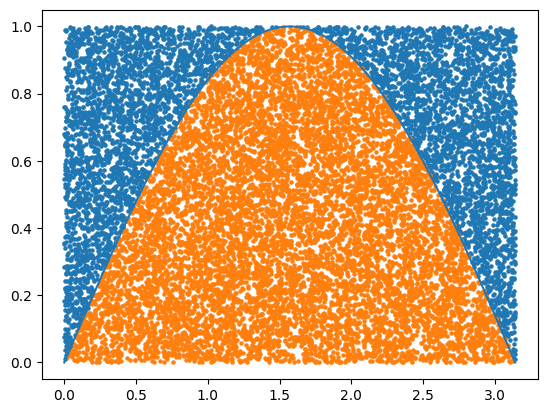

In [11]:
# We can take a graphical look about what is happening
# Lets plot the function
x = np.linspace(0,np.pi,100)
y = np.sin(x)

plt.plot(x,y)

# Lets plot the points
plt.scatter(x_out,y_out,s=5)
plt.scatter(x_in,y_in,s=5)
plt.show()

Now, let's try to use our new superpowers to solve more difficult situations.
Consider the function:

$$ f(x) = x^2 \sin(18x) + \pi x$$

Maybe this is a mathematically simple integration to do, but graphically we can see what the Monte Carlo will do with it.
Let's define the function and see what we are dealing with:

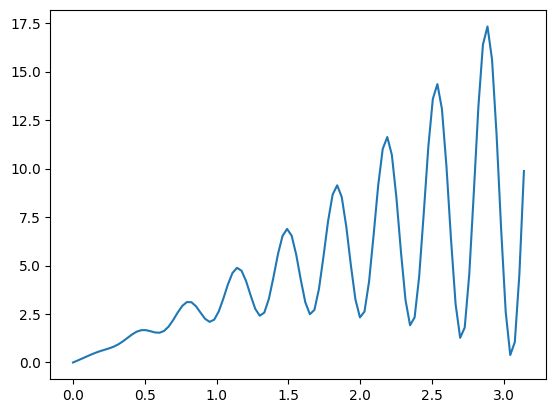

In [12]:
# Lets plot the function
def fu (x):
    y = (x**2)*np.sin(18*x)+np.pi*x
    return y


x = np.linspace(0,np.pi,100)
y = fu(x)

plt.plot(x,y)
plt.show()

Then the integral we will try to solve will be:
$$ \int_0^\pi x^2 \sin(18x) + \pi x d x = \frac{1}{18}\pi^2 (9 \pi -1) \approx 14.955$$

Now let's apply the same idea and verify if we need to do some changes:

In [13]:
N = 10000

x_in = []
x_out = []
y_in = []
y_out = []

i = 0
while i < N:
    x_temp = rand()*np.pi
    y_temp = rand()*18
    if y_temp <= fu(x_temp):
        y_in.append(y_temp)
        x_in.append(x_temp)
        i += 1
    else:
        x_out.append(x_temp)
        y_out.append(y_temp)

(len(y_in)/(len(x_in)+len(x_out)))*(np.pi*18)

14.792086574228014

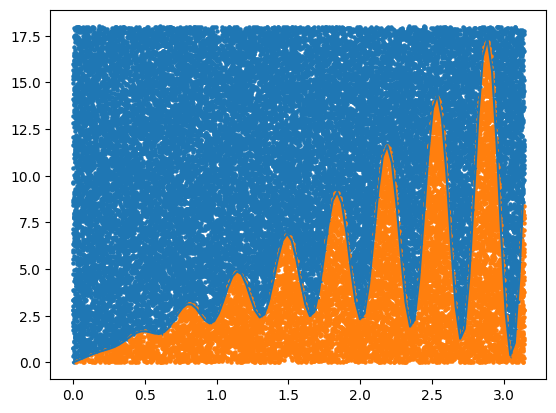

In [14]:
# Lets plot the points
plt.plot(x,y)
plt.scatter(x_out,y_out,s=5)
plt.scatter(x_in,y_in,s=5)
plt.show()

We can see clearly that we are generating way more points than we need, in this case is not relevant, but with more complex problems we will need to be resourceful and efficient.

## Probability Distributions

Sometimes to solve a problem in the most efficient way we need to know a preliminary condition to the solution of the problem, this could be related to the probability of the solution to exist. In the case we are analyzing now, it is clear that the function only exist  in one half of the area that we are analyzing. We can improve the program by changing the sampling method for the random number, this will be effectively making them less random, this can create a new problem that is known as over fitting, we want to avoid this mistake. For now, we will only learn how to make new random number distributions.

Let's learn how to make random numbers in a pattern:

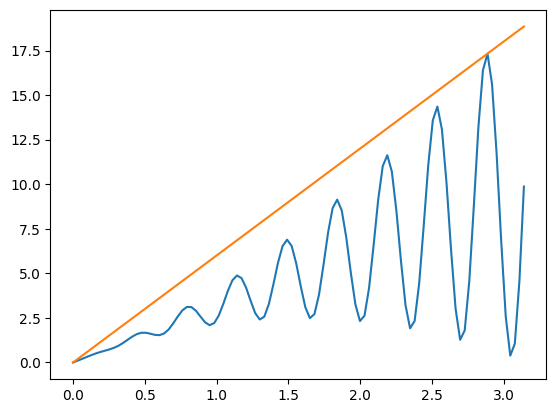

In [15]:
def m (x):
    y = (18/3)*x
    return y

z = m(x)

plt.plot(x,y)
plt.plot(x,z)

In [16]:
# now for each pair of numbers we will have to generate:
def Random_slope():
    """
    This func return a pair of random numbers below the slope
    """
    x_temp = rand()*np.pi
    y_temp = rand()*m(x_temp)
    return x_temp, y_temp

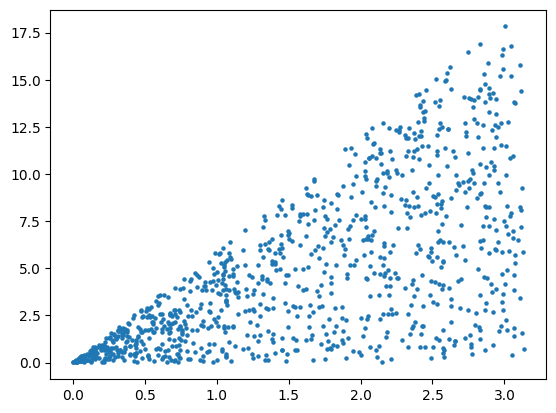

In [17]:
x_rand = []
y_rand = []
for i in range(1000):
    xt,yt = Random_slope()
    x_rand.append(xt)
    y_rand.append(yt)

plt.scatter(x_rand,y_rand,s=5)

In [18]:
N = 10000

x_in = []
x_out = []
y_in = []
y_out = []

i = 0
while i < N:
    x_temp,y_temp = Random_slope()
    if y_temp <= fu(x_temp):
        y_in.append(y_temp)
        x_in.append(x_temp)
        i += 1
    else:
        x_out.append(x_temp)
        y_out.append(y_temp)

(len(y_in)/(len(x_in)+len(x_out)))*(((18/3)*np.pi**2)/2)

15.280390774251988

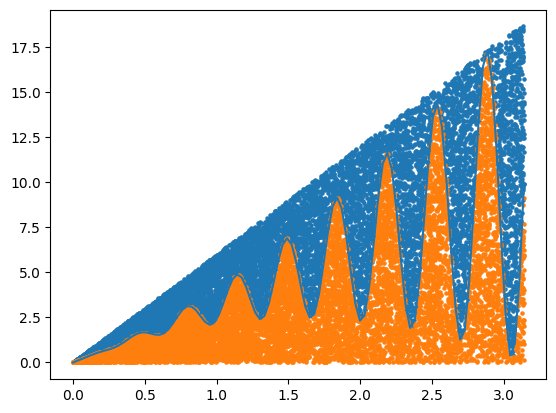

In [19]:
# Lets plot the points
plt.plot(x,y)
plt.scatter(x_out,y_out,s=5)
plt.scatter(x_in,y_in,s=5)
plt.show()

This approach is more efficient, however wrong. The idea is good, but need to be improved.

The problem we are facing here is the generation of good random numbers. We can see in the plot that the numbers are not uniformly distributed in the area under the line. We need to think on a better way to generate this random numbers.

## Metropolis Algorithm

We can think about the Metropolis Algorithm as a simplified Monte Carlo calculation. The basic idea is that we will generate random numbers, and we will only allow those that are permitted by the probability function. Knowing the probability then, sampling a very large number of random numbers we will have a good approximation of the desire distribution.

In [20]:
def Slope (x):
    return (18/3)*x
    
def Random_Triang():
    """
    This func return a pair of random numbers x y in a
    triangular ditribution of probability
    """
    x = 0
    p = 1
    while p > Slope(x):
        x = rand()*np.pi
        p = rand()*Slope(np.pi)
    y = Slope(x)*rand()
    return x,y
    

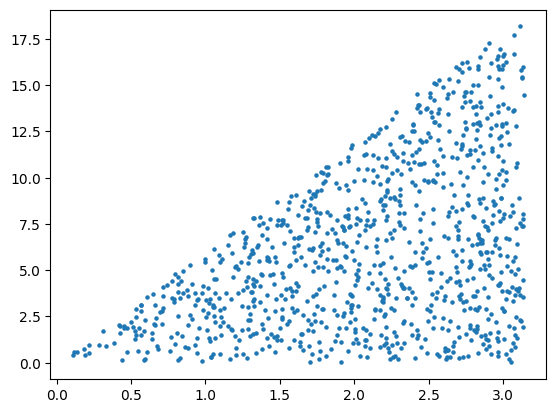

In [21]:
x_rand = []
y_rand = []
for i in range(1000):
    xt,yt = Random_Triang()
    x_rand.append(xt)
    y_rand.append(yt)

plt.scatter(x_rand,y_rand,s=5)

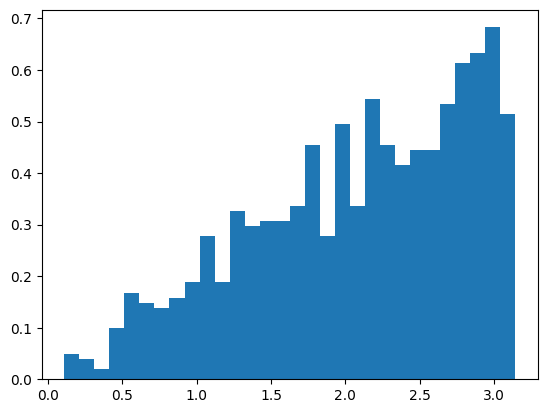

In [22]:
plt.hist(x_rand, bins=30, density=True)
plt.show()
# You can try to run cell [17] again and then this one and compare the differences

Now let's try to do the integration again with the new function to generate the random numbers.

In [23]:
N = 10000

x_in = []
x_out = []
y_in = []
y_out = []

i = 0
while i < N:
    x_temp,y_temp = Random_Triang()
    if y_temp <= fu(x_temp):
        y_in.append(y_temp)
        x_in.append(x_temp)
        i += 1
    else:
        x_out.append(x_temp)
        y_out.append(y_temp)

(len(y_in)/(len(x_in)+len(x_out)))*(((18/3)*np.pi**2)/2)

14.687639864709595

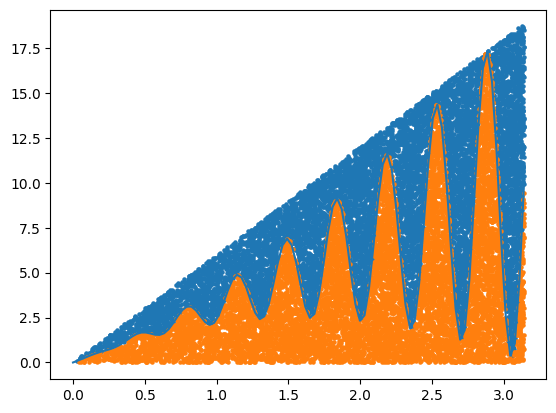

In [24]:
# Lets plot the points
plt.plot(x,y)
plt.scatter(x_out,y_out,s=5)
plt.scatter(x_in,y_in,s=5)
plt.show()

## Task 2

The adequate choice of the random numbers used are different from problem to problem. The study of the efficiency of the solutions is worth of our time before spending computational time of our machines. For the integral we just solve we proposed 3 different methods based on random number distributions. Each of these methods have its own complexity and computational dimension. For this 3 solutions:
1. Try to modify the code of each solution to make it more efficient.
2. Analyze the amount of times the program is running and not contributing to the result, this is: calculate the ratio of points generated outside the area of interest.
3. Using the new functions, analyze the results statistical distribution, is it normal?
4. How the results distribution changes with the number of Samples?
5. What is the best method and why?